In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
mouse = pd.read_csv('../input/Data_Cortex_Nuclear.csv')

In [3]:
mouse.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

In [4]:
mouse.shape

(1080, 82)

In [9]:
mouse['Behavior'].value_counts()

S/C    555
C/S    525
Name: Behavior, dtype: int64

In [5]:
# Check total missing values for each column

mouse.isnull().sum()

MouseID              0
DYRK1A_N             3
ITSN1_N              3
BDNF_N               3
NR1_N                3
NR2A_N               3
pAKT_N               3
pBRAF_N              3
pCAMKII_N            3
pCREB_N              3
pELK_N               3
pERK_N               3
pJNK_N               3
PKCA_N               3
pMEK_N               3
pNR1_N               3
pNR2A_N              3
pNR2B_N              3
pPKCAB_N             3
pRSK_N               3
AKT_N                3
BRAF_N               3
CAMKII_N             3
CREB_N               3
ELK_N               18
ERK_N                3
GSK3B_N              3
JNK_N                3
MEK_N                7
TRKA_N               3
                  ... 
RRP1_N               0
BAX_N                0
ARC_N                0
ERBB4_N              0
nNOS_N               0
Tau_N                0
GFAP_N               0
GluR3_N              0
GluR4_N              0
IL1B_N               0
P3525_N              0
pCASP9_N             0
PSD95_N    

In [10]:
# Check missing values for a randomly selected protein 'DYRK1A_N'
mouse[mouse['DYRK1A_N'].isnull()]

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
987,3426_13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.180419,0.976257,0.193317,2.659534,0.304412,0.523670,1.052030,0.236699,0.177195,0.171332,0.115931,0.159900,0.174703,0.288436,0.120035,0.188773,0.113880,0.504763,0.317309,1.472226,2.154038,0.161952,1.214422,0.997655,0.195369,0.182471,0.134398,0.115931,0.112854,0.405540,0.151693,0.163125,0.208852,1.443353,Ts65Dn,Saline,S/C,t-SC-s
988,3426_14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.189153,1.009553,0.191799,2.636243,0.335391,0.525279,0.998971,0.236626,0.183422,0.184744,0.118607,0.164756,0.190917,0.289536,0.128454,0.191505,0.115226,0.536890,0.322163,1.504703,2.149177,0.168577,1.224868,0.997942,0.194444,0.180335,0.133892,0.118607,0.120664,0.422986,0.175044,0.185038,0.195326,1.443269,Ts65Dn,Saline,S/C,t-SC-s
989,3426_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.183789,1.038895,0.185273,2.640736,0.328979,0.526425,1.003711,0.241983,0.189578,0.167013,0.122625,0.155137,0.172803,0.300327,0.128118,0.183640,0.122031,0.542458,0.319626,1.597684,2.216152,0.161966,1.276277,1.056710,0.207096,0.180523,0.139697,0.122625,0.098278,0.427405,0.172209,0.200861,0.233076,1.495249,Ts65Dn,Saline,S/C,t-SC-s


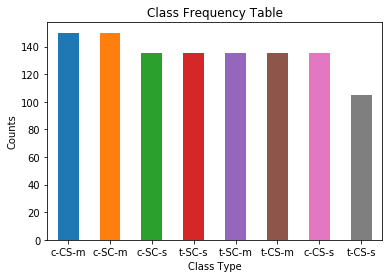

In [12]:
# Plot frequency of unique values for 'class'

mouse['class'].value_counts().plot(kind='bar')

plt.title('Class Frequency Table')
plt.xlabel('Class Type')
plt.ylabel('Counts')
plt.xticks(rotation='horizontal')
plt.show()

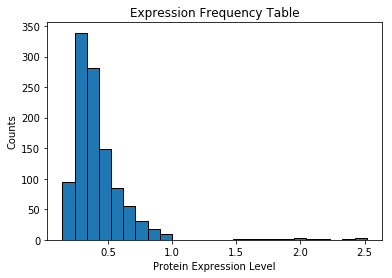

In [13]:
# Histogram of protein expression level - DYRK1A

protein = mouse['DYRK1A_N'].dropna()
plt.hist(protein, bins=25, edgecolor='black')
plt.title('Expression Frequency Table')
plt.xlabel('Protein Expression Level')
plt.ylabel('Counts')
plt.show()

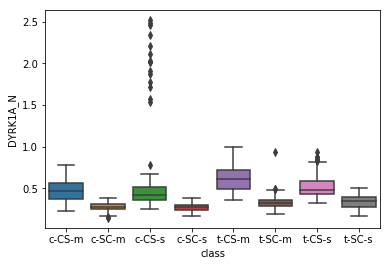

In [14]:
# Boxplot of Protein Expression Level by Class

protein = mouse[['DYRK1A_N', 'class']].dropna()
sns.boxplot(x='class', y='DYRK1A_N', data=protein)
plt.show()

In [19]:
# 세개 이상의 집단에 대한 평균 비교를 하기 위해 ANOVA (분산분석) 을 시행함

# ANOVA 사용하기 위한 가정
# 1. 독립성 : 자료의 추출은 독립적으로 이루어졌음 (무선표집을 하였다면 만족하는 것으로 여김)
# 2. 정규성: 조사하고자 하는 자료 (variable in question) 의 모집단 분포는 정규분포를 따름
# 3. 등분산성: 모든 집단의 모분산은 동일함

# 8개 클래스 (8개 집단) 에 대해 DYRK1A_N 단백질 발현정도의 평균을 비교한다

# 귀무가설: 모든 집단의 평균이 동일하다
# 대립가설: 적어도 한 집단의 평균이 다른 집단들과 다르다

protein = mouse[['DYRK1A_N', 'class']].dropna()

g1 = protein[(protein['class'] == 'c-CS-m')]['DYRK1A_N']
g2 = protein[(protein['class'] == 'c-SC-m')]['DYRK1A_N']
g3 = protein[(protein['class'] == 'c-CS-s')]['DYRK1A_N']
g4 = protein[(protein['class'] == 'c-SC-s')]['DYRK1A_N']
g5 = protein[(protein['class'] == 't-CS-m')]['DYRK1A_N']
g6 = protein[(protein['class'] == 't-SC-m')]['DYRK1A_N']
g7 = protein[(protein['class'] == 't-CS-s')]['DYRK1A_N']
g8 = protein[(protein['class'] == 't-SC-s')]['DYRK1A_N']

print(stats.f_oneway(g1, g2, g3, g4, g5, g6, g7, g8)) 

F_onewayResult(statistic=62.083729354147344, pvalue=5.9252681209412102e-75)


검정통계량값 statistic = 62.08, p-value = 5.92e-75  
p-value < 0.05 이므로, 유의수준 5%에서, 8개 집단의 평균에서 통계적으로 유의미한 차이가 있음  

ANOVA 는 다중의 집단의 평균에서 유의미한 차이가 있는지만 검증함  
구체적으로 어떤 수준(집단)이 차이가 있는지 확인하려면 사후분석(post hoc tests) 이 필요함  

유의미한 차이가 없는 경우에는 사후분석할 필요가 없음

In [20]:
# 아래 두 쌍의 독립표본에 대하여, 독립표본 t검정 시행함

# 그룹1 : 정상, 컨텍스트-공포, memantine
# 그룹2 : 정상, 공포-컨텍스트, memantine

# 그룹5 : 실험군, 컨텍스트-공포, memantine
# 그룹7 : 실험군, 공포-컨텍스트, saline

print(stats.ttest_ind(g1, g2))
print(stats.ttest_ind(g5, g7))

Ttest_indResult(statistic=18.354934961648919, pvalue=7.17061288431182e-51)
Ttest_indResult(statistic=4.807117076740461, pvalue=2.7147190240318595e-06)


p-value<0.05이므로, 유의수준 5%에서, 그룹1과 그룹2는 평균에서 유의미한 차이가 있음  
p-value<0.05이므로, 유의수준 5%에서, 그룹5와 그룹7은 평균에서 유의미한 차이가 있음

In [22]:
# Data Cleaning
# Remove columns with NaN >= 10, then drop rows with missing data and categorical columns

print(mouse.shape)
mouse_new = mouse[mouse.columns[mouse.isnull().sum() < 10]].dropna().drop(['MouseID', 'Genotype', 'Treatment', 'Behavior'], axis=1)
print(mouse_new.shape)

(1080, 82)
(1073, 70)


In [23]:
# feature : 77종류 단백질 발현정도
# target : 클래스1 (실험군, 컨텍스트-공포, saline), 클래스1 (실험군, 공포-컨텍스트, saline)
# 사용 머신러닝 모델 : 서포트 벡터 머신
# 훈련 유형 : Logistric regression (or classification)

df = mouse_new[(mouse_new['class'] == 'c-CS-s') | (mouse_new['class'] == 'c-SC-s')].copy()
df.loc[:, 'class'].replace({'c-CS-s': 1, 'c-SC-s': 0}, inplace=True)
X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(X_train.head(3))

(212, 69)
(54, 69)
     DYRK1A_N   ITSN1_N    BDNF_N    ...        pS6_N     SYP_N    CaNA_N
325  0.331241  0.480300  0.311541    ...     0.107802  0.474800  1.816057
480  0.294368  0.511890  0.330163    ...     0.135011  0.521688  1.125455
501  0.264036  0.429417  0.276054    ...     0.118540  0.392842  0.914582

[3 rows x 69 columns]


In [ ]:
svm = SVC(gamma='scale')
svm.fit(X_train, y_train)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))